# Your First Neural Network

### Exercise objectives
- Write your first Neural Network
- Inspect some of the most important hyperparameters of Neural Networks

<hr>
<hr>


In this exercise, you will build your first Neural Network that will separate two classes.
Each data $X$ has only two coordinates $X = (x_1, x_2)$ and belongs to either the class 0 or to the class 1. It is called the `moons dataset`. 

As there are only two features, the points can be represented on a 2D-scatterplot, where the colors correspond to the two available classes: $\color{blue}{blue}$ and $\color{red}{red} $. Here is an example of such data : 

![Two moons](moons_example.png)



## 1. Create data

Here, we will use the scikit-learn `make_moons` function [(see documentation here)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) to create 2 moons that cannot be linearly separated. Each moon correspond to a class.

In [7]:

### Data generation
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.datasets import make_moons

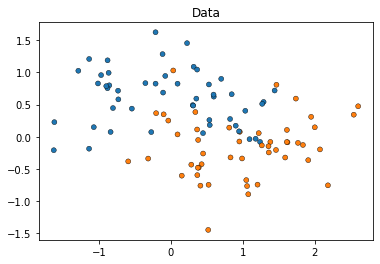

In [8]:
### This function allows to plot the two moons
X, y = make_moons(noise=0.352, random_state=1, n_samples=100)

sns.scatterplot(
    x=X[:, 0], y=X[:, 1], hue=y, marker="o", s=25, edgecolor="k", legend=False
).set_title("Data")
plt.show()

❓ Play with the number of samples and the noise to discover the effects on the moons dataset, by plotting the moons for different values

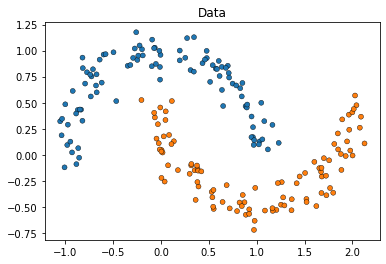

In [9]:
X, y = make_moons(noise=0.1, random_state=1, n_samples=200)

sns.scatterplot(
    x=X[:, 0], y=X[:, 1], hue=y, marker="o", s=25, edgecolor="k", legend=False
).set_title("Data")
plt.show()

❓ Draw 250 samples of the data with a noise equal to 0.20 (random state being 0) and split the initial dataset into a train and test set (size: 70/30%)

*Remark* : Please call the variables `X_train`, `y_train`, `X_test` and `y_test`

In [10]:
B, a = make_moons(n_samples=250, noise=0.20, random_state=0)
ma = pd.DataFrame(dict(b=B[:,0], a=B[:,1], label=a))
target = ma.label
ma.drop(['label'], axis=1, inplace=True)
r = target
R = ma
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(R,r,test_size=0.3,random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((175, 2), (175,), (75, 2), (75,))

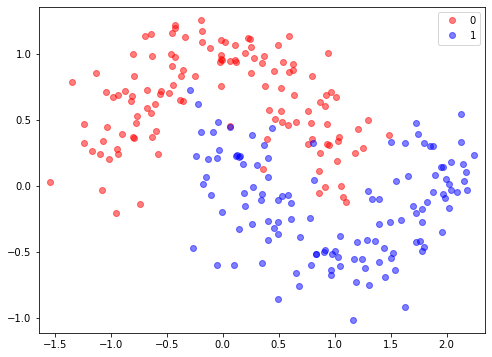

In [11]:
def plot_data(X, y, figsize=None):
    if not figsize:
        figsize = (8, 6)
    plt.figure(figsize=figsize)
    plt.plot(X[y==0, 0], X[y==0, 1], 'or', alpha=0.5, label=0)
    plt.plot(X[y==1, 0], X[y==1, 1], 'ob', alpha=0.5, label=1)
    plt.xlim((min(X[:, 0])-0.1, max(X[:, 0])+0.1))
    plt.ylim((min(X[:, 1])-0.1, max(X[:, 1])+0.1))
    plt.legend()
plot_data(B, a)




## 2. Simple model

You will now define your first neural network.
The architecture of your model should have : 
- a first layer with 5 neurons, with a `relu` activation function and the correct input dimension
- a output layer suited to your 2-class classification task.


❓ Complete the next function with the previous architecture

In [1]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
def initialize_model():
 model = Sequential()
 model.add(Dense(5, input_shape=(2,), activation='relu'))
 model.add(Dense(1, activation='sigmoid'))
 model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
 return model

In [2]:
models = initialize_model()
models.summary();#21 parameters

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 15        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


❗ **Remark** ❗ Briefly speaking, the **`.compile()`** tells your algorithm how to optimize the weights of your network once it will be fit on real data. **`binary_crossentropy`** is the "log-loss" that you have have to use and explain

❓ How many parameters does the model have?  
Double check using the **`.summary()`** function which displays the stack of layers, the shape of the output after each layer, and the number of parameters of each layer. Use this function to check that you have 21 parameters i.e. weights in your model.

You are now ready to train your algorithm on the training set:

In [12]:
history = models.fit(X_train, y_train, verbose=0, epochs=10)


### Fit history

`history` contains information about the training.

❓ Inspect all its attributes using `history.__dict__`. You will see epoch-by-epoch info stored in `history.history`

In [25]:
history.__dict__

{'validation_data': None,
 'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x20d59e75fa0>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [0.7040184140205383,
   0.6996462345123291,
   0.6952618360519409,
   0.6908614039421082,
   0.6866505742073059,
   0.6823033094406128,
   0.6780523061752319,
   0.6738157272338867,
   0.6696158647537231,
   0.6653493046760559],
  'accuracy': [0.48571428656578064,
   0.5314285755157471,
   0.5314285755157471,
   0.5428571701049805,
   0.5485714077949524,
   0.5714285969734192,
   0.6000000238418579,
   0.6514285802841187,
   0.7028571367263794,
   0.7428571581840515]},
 'params': {'verbose': 0, 'epochs': 10, 'steps': 6},
 'epoch': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}

In [13]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,epoch
5,0.682303,0.571429,5
6,0.678052,0.600000,6
7,0.673816,0.651429,7
8,0.669616,0.702857,8
9,0.665349,0.742857,9


❓ Plot the history of the train loss using the following function

In [14]:
def plot_loss(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, historydf.values.max()))
    plt.title('Loss: %.3f' % history.history['loss'][-1])

<Figure size 576x432 with 0 Axes>

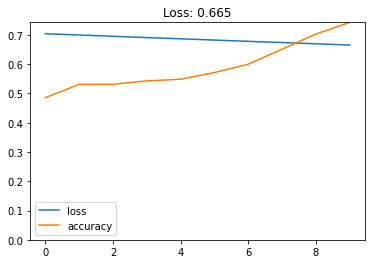

In [16]:
plot_loss(history)

### Predict & Evaluate performance on test set

You can predict `y_pred` using the **`.predict()`** method.

In [15]:
y_pred = models.predict(X_test, verbose=0)
y_pred

array([[0.50504804],
       [0.50197244],
       [0.4599347 ],
       [0.45425975],
       [0.50127125],
       [0.49342015],
       [0.5068733 ],
       [0.47163987],
       [0.5071853 ],
       [0.48319992],
       [0.5044485 ],
       [0.4920929 ],
       [0.5078828 ],
       [0.47538257],
       [0.47671175],
       [0.46397197],
       [0.50945115],
       [0.47664636],
       [0.483058  ],
       [0.47477525],
       [0.4453647 ],
       [0.4487825 ],
       [0.4566766 ],
       [0.509247  ],
       [0.4456604 ],
       [0.47682282],
       [0.45077008],
       [0.4641084 ],
       [0.48728004],
       [0.49670544],
       [0.47537363],
       [0.47229245],
       [0.47712702],
       [0.47672546],
       [0.5112332 ],
       [0.48136237],
       [0.5061495 ],
       [0.5086241 ],
       [0.48391008],
       [0.47697008],
       [0.4975322 ],
       [0.4689385 ],
       [0.4566763 ],
       [0.45706353],
       [0.4800348 ],
       [0.47374532],
       [0.45882672],
       [0.451

You can use the **`.evaluate()`** method to return the **`loss value`** &  and the **`performance metrics`**

In [17]:
score = models.evaluate(X_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.6646
Test Accuracy : 0.7733


- The first element corresponds to the **loss** value, set to `"binary_crossentropy"` in `model.compile()`. Its value is hard to interpret.

- The second element is the **metrics**, that we set to `"accuracy"`

❓ What is your accuracy on the test test? Store the value as a `float` in the `accuracy` variable.

In [18]:
# Evaluate the model on test data
_, test_acc = models.evaluate(X_test, y_test, verbose=0)

print(f"Test accuracy: {test_acc:.5f}")

Test accuracy: 0.77333


❓ Check your prediction visually by using our `plot_decision_regions` available in `utils/plots.py`. It looks a bit underfitted, right? We will create a deeper network next!

In [26]:
# %load utils/plots.py
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    """Plot the 2D-decision region of a classifier with matplotlib along its first two dimensions X[:,0] and X[:,1].

    Args:
        X (np.Array): (n,p) dataset to classify
        y (np.Array): (n,) array of labels. Works well up to 5 unique labels.
        classifier: fitted classifier with `.predict()` method 
        test_idx (int, optional):  Index of test datapoints within X to display with a larger mark style. Defaults to None.
        resolution (float, optional): Resolution of the meshgrid used to colorize regions. Defaults to 0.02.
    """

    # setup marker generator and color map up for up to 5 classes
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=cmap(idx),
                    marker='x', label=cl)

    # Plot test samples if they exist
    if not test_idx is None:
        X_test, y_test = X[test_idx, :], y[test_idx]
        for idx, cl in enumerate(np.unique(y_test)):
            plt.scatter(x=X_test[y_test == cl, 0], y=X_test[y_test == cl, 1],
                        alpha=1, color=cmap(idx),
                        linewidths=1, marker='o', s=55, label=f'test {cl}')
    plt.legend()


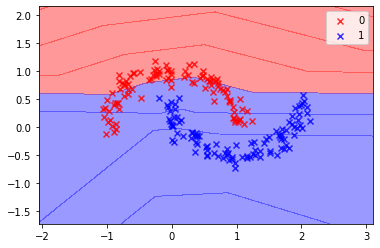

In [29]:
plot_decision_regions(X, y, classifier=models,resolution=0.02)

## 3. Variations

❓ Relaunch the model on 500 iterations
- Don't forget to call the `initialize_model` function, otherwise, your initial parameters will be those you have already learnt on the previous fit!!)
- Plot the history to see how the loss changed over the different epochs/iterations.

In [30]:
history = models.fit(X_train, y_train, verbose=0, epochs=500)

❓ Did the test accuracy improve?

<Figure size 576x432 with 0 Axes>

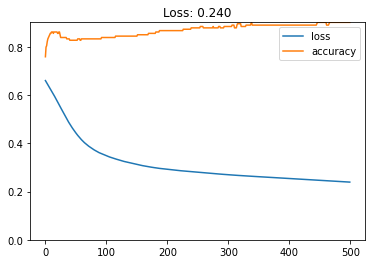

In [31]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()
plot_loss(history)

Not necessarily...So when should we stop training a Deep Learning Model?
Answer in the next chapter `Optimizers, Loss, Fitting` of this `Deep Learning Module` !

❓ Let's try a **deeper** architecture that includes : 

- a first layer with 20 neurons (activation: `"relu"`)
- a second layer with 10 neurons (activation: `"relu"`)
- a third layer with 5 neurons (activation: `"relu"`)
- an output layer suited for this problem


In [32]:
_, test_acc = models.evaluate(X_test, y_test, verbose=0)

print(f"Test accuracy: {test_acc:.5f}")

Test accuracy: 0.88000


❓ What is the number of parameters of your new model?

In [33]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
def initialize_model():
 model = Sequential()
 model.add(Dense(20, input_shape=(2,), activation='relu'))
 model.add(Dense(10, input_shape=(2,), activation='relu'))
 model.add(Dense(5, input_shape=(2,), activation='relu'))
 model.add(Dense(1, activation='sigmoid'))
 model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
 return model

Run your model on the previous data with 500 epochs and plot the loss afterwards.  
❓ What is your accuracy on the test test? Store it as `accuracy_deep` variable (`float`).

In [34]:
models = initialize_model()
models.summary();#331 parameters

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 20)                60        
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


<Figure size 576x432 with 0 Axes>

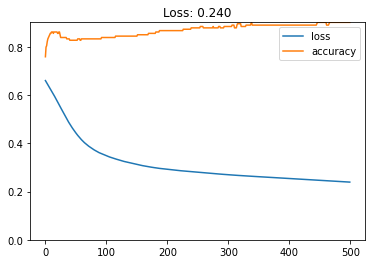

In [35]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()
plot_loss(history)

❓ Do you think we have overfitted on the noise? Check it out below

In [36]:
_, test_acc = models.evaluate(X_test, y_test, verbose=0)

print(f"Test accuracy: {test_acc:.5f}")

Test accuracy: 0.25333


In [1]:
plot_decision_regions(X, y, classifier=models,resolution=0.02)

NameError: name 'plot_decision_regions' is not defined